# MNIST dataset

source 1: https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html

source 2: https://keras.io/examples/mnist_cnn/

source 3: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

## Load packages

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 
from sklearn.preprocessing import OneHotEncoder


import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import tensorflow as tf

In [0]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    
    from sklearn.metrics import confusion_matrix
    from sklearn.utils.multiclass import unique_labels

    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots(figsize=(8,8))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

## Load dataset

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
n_samples, img_rows, img_cols = x_train.shape
n_test_samples = x_test.shape[0]

In [0]:
if tf.keras.backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [0]:
x_train_flat = x_train.reshape((n_samples, -1))
x_test_flat = x_test.reshape((n_test_samples, -1))

In [6]:
ohe = OneHotEncoder()
y_train_ohe = ohe.fit_transform(y_train.reshape(-1, 1))
y_test_ohe = ohe.transform(y_test.reshape(-1, 1))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


## Keras CNN

In [7]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
        
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, tf.keras.utils.to_categorical(y_train),
          batch_size=256,
          epochs=20,
          verbose=1)

y_pred_cnn = model.predict(x_test)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
60000/60000 [==============================] - 7s 115us/sample - loss: 2.0640 - acc: 0.8097
Epoch 2/20
60000/60000 [==============================] - 3s 54us/sample - loss: 0.1371 - acc: 0.9600
Epoch 3/20
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0959 - acc: 0.9729
Epoch 4/20
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0771 - acc: 0.9776
Epoch 5/20
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0633 - acc: 0.9812
Epoch 6/20
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0535 - acc: 0.9841
Epoch 7/20
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0482 - acc: 0.9855
Epoch 8/20
60000/60000 [==========================

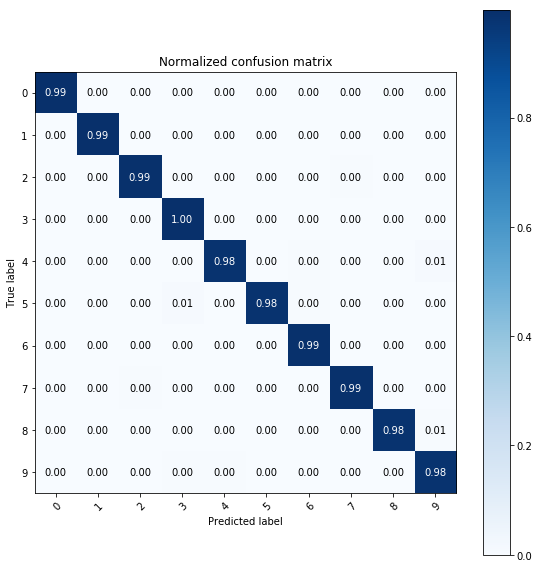

In [0]:
plot_confusion_matrix(y_test, ohe.inverse_transform(y_pred_cnn), classes=np.array([i for i in range(0,10)]), normalize=True,
                      title='Normalized confusion matrix')

plt.show()